In [2]:
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sounddevice as sd
from pydub import AudioSegment
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from itertools import cycle
from scipy.signal import lfilter
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

V tejto časti importujeme potrebné knižnice, potom nastavíme tému a farebnú paletu pre grafické zobrazenia.

In [3]:
x, Fs = librosa.load("../git/sounds/hit_loop.wav")

# Oneskorenie ( >= 30 msec )
dSec = 0.25
dSamples = math.ceil(dSec * Fs)

Načíta zvukový súbor Kick.wav, nastaví oneskorenie dSec v sekundách a na základe vzorkovacej frekvencie Fs sa vypočíta príslušný počet dSamples.

In [4]:
b = 0.75
citFIR = np.zeros((1,dSamples-2))
CF = citFIR.flatten()
CF[0]=1
CF[len(CF)-1]=b
menFIR = (1)
print(CF)

[1.   0.   0.   ... 0.   0.   0.75]


Táto časť definuje parametre filtrovania. b predstavuje zosilnenie pre oneskorenú vetvu. FIR filter sa vytvára pomocou poľa CF, kde sa prvý a posledný prvok nastaví na príslušné hodnoty, aby sa vytvoril efekt echa. CitFIR a menFIR predstavujú čitateľ a menovateľ filtra.

In [5]:
y = lfilter(CF, menFIR, x)

V tejto časti sa signál x filtruje pomocou funkcie lfilter z knižnice SciPy. Na vstupný signál x sa aplikuje FIR filter definovaný poliami CF a menFIR a výsledok sa uloží do premennej y.

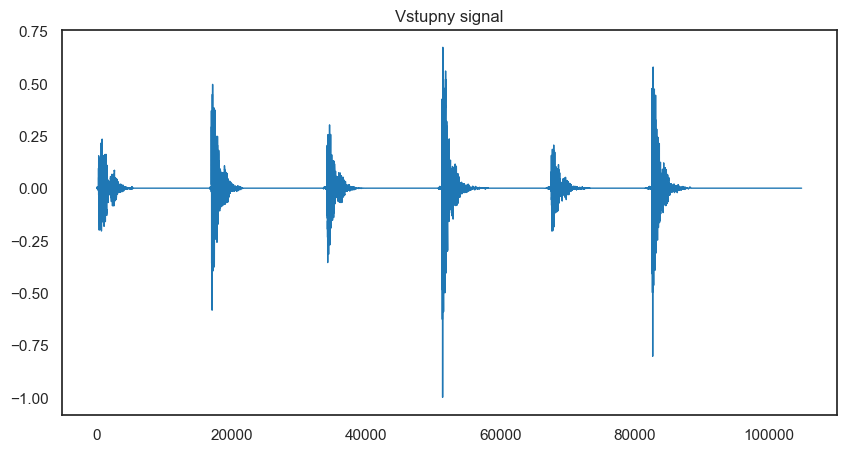

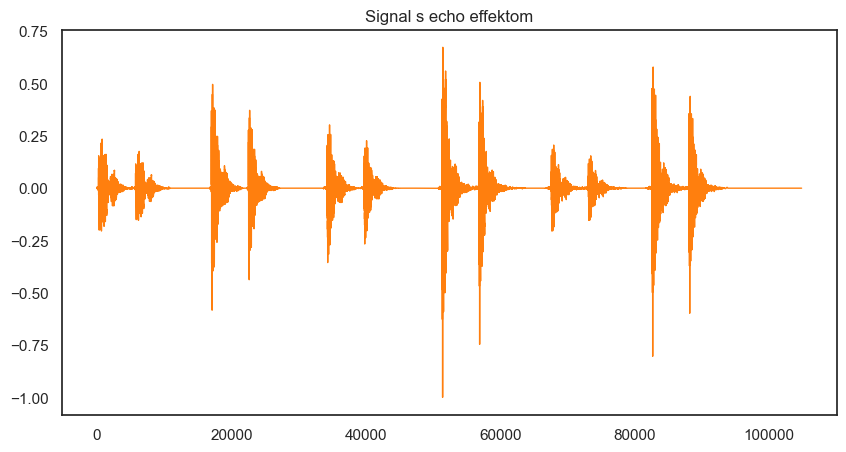

In [6]:
pd.Series(x).plot(figsize=(10,5),
                  lw=1,
                  title='Vstupny signal',
                  color=color_pal[0])

plt.show()
pd.Series(y).plot(figsize=(10,5),
                  lw=1,
                  title='Signal s echo effektom',
                  color=color_pal[1])

plt.show()

Tento kód vykonáva doprednú filtráciu zvukového signálu pomocou FIR filtra. Načíta zvukový súbor, nastaví parametre oneskorenia a útlmu na vytvorenie efektu ozveny, určí koeficienty filtra a použije filtrovanie na vstupný signál. Výsledok filtrovania sa uloží do premennej y, ktorá obsahuje zvukový signál s pridaným efektom echa.

In [8]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/hit_loop.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(x, Fs)
time.sleep(seconds_duration + 1)
sd.play(y, Fs)